In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"]=(df["class"]=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


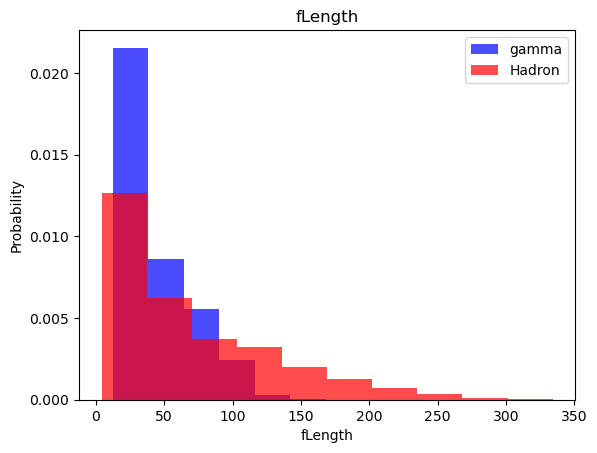

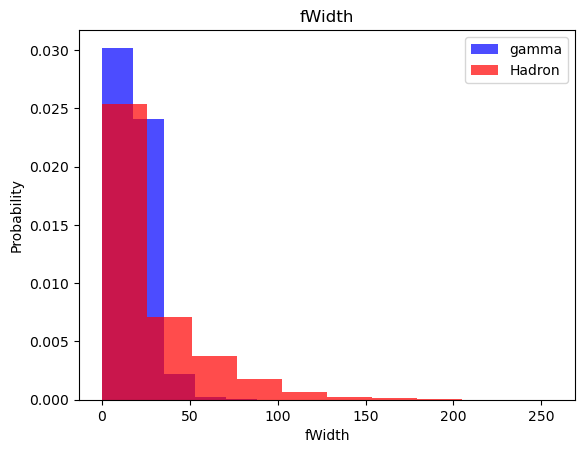

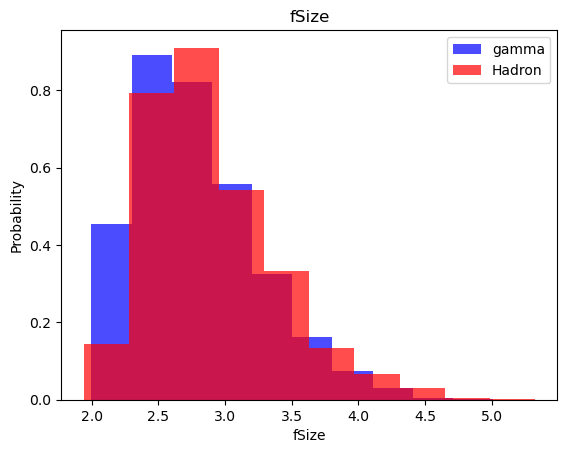

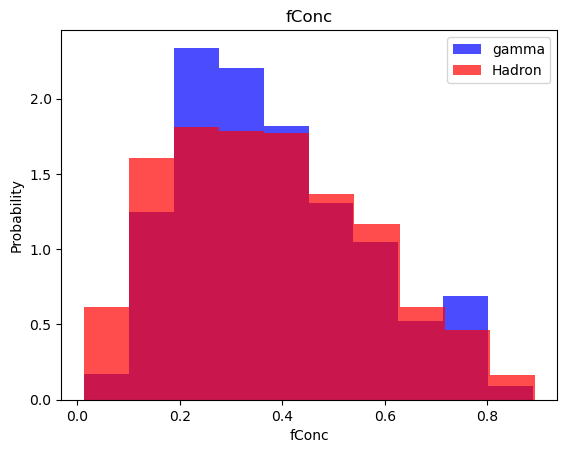

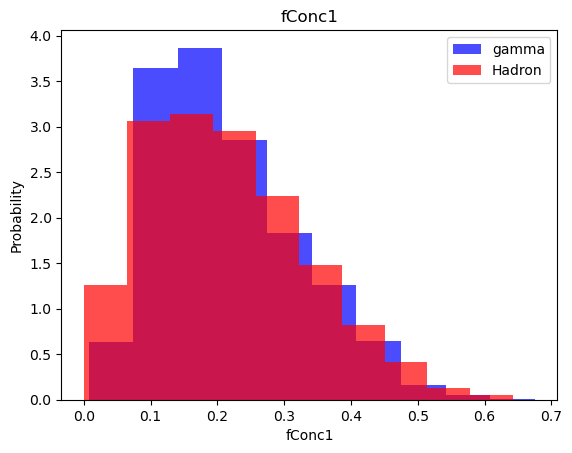

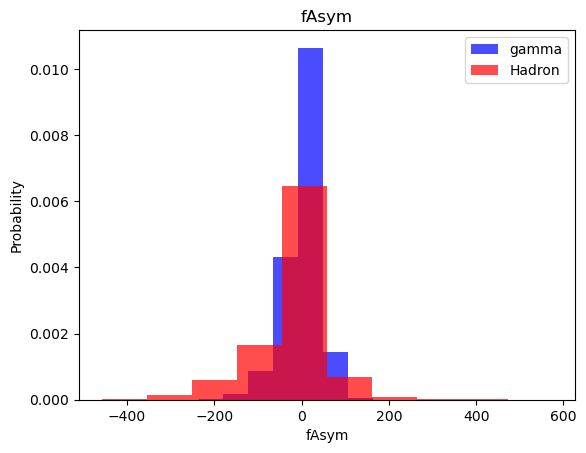

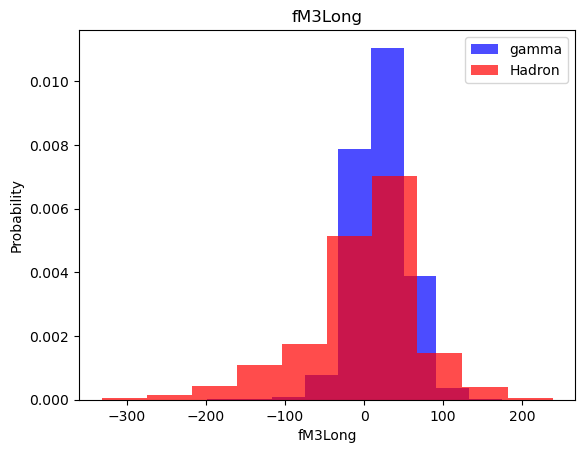

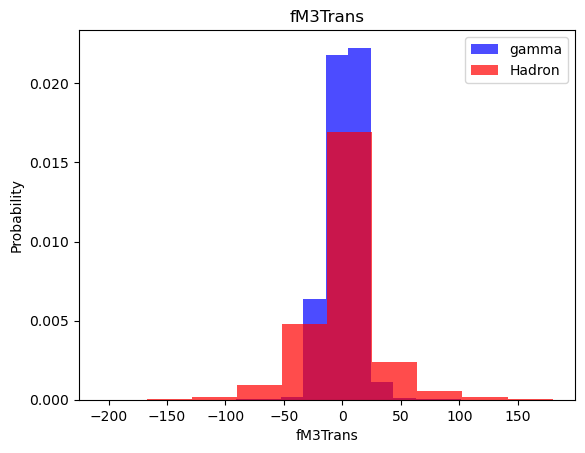

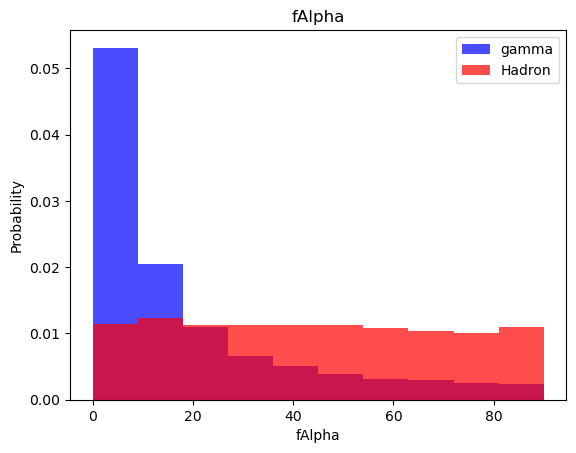

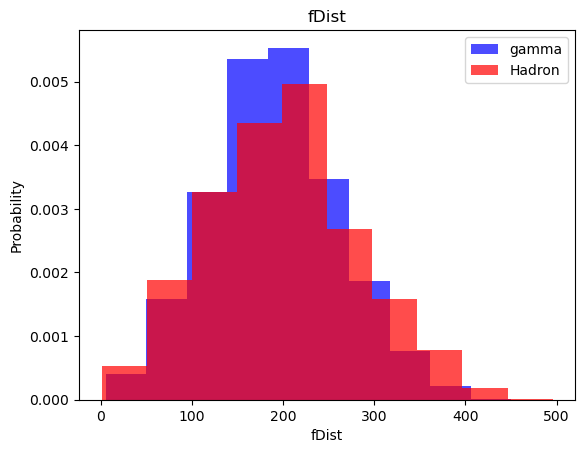

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='Hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [5]:
train ,valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [6]:
def scale_dataset(dataframe,oversample=False):
    x= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
        
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    data=np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y
                   
    
    

In [7]:
train , x_train , y_train = scale_dataset(train,oversample=True)
valid , x_valid , y_valid = scale_dataset(valid,oversample=False)
test , x_test , y_test = scale_dataset(test,oversample=False)

In [8]:
#KNN (K-nearest neighbors method)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred=knn_model.predict(x_test)

In [12]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [13]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1341
           1       0.85      0.87      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [15]:
#Naive bayes method

In [16]:
from sklearn.naive_bayes import GaussianNB


In [17]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [18]:
y_pred=nb_model.predict(x_test)

In [19]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52      1341
           1       0.74      0.83      0.78      2463

    accuracy                           0.70      3804
   macro avg       0.67      0.64      0.65      3804
weighted avg       0.69      0.70      0.69      3804



In [22]:
#Logistic Regression method

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [25]:
y_pred=lg_model.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1341
           1       0.85      0.76      0.80      2463

    accuracy                           0.76      3804
   macro avg       0.74      0.76      0.75      3804
weighted avg       0.78      0.76      0.76      3804



In [27]:
#SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [30]:
y_pred=svm_model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1341
           1       0.90      0.86      0.88      2463

    accuracy                           0.85      3804
   macro avg       0.83      0.85      0.84      3804
weighted avg       0.85      0.85      0.85      3804



In [32]:
#Neural Net     

In [1]:
import tensorflow as tf

In [34]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                metrics=['accuracy'])

In [37]:
history=nn_model.fit(
    x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0
)

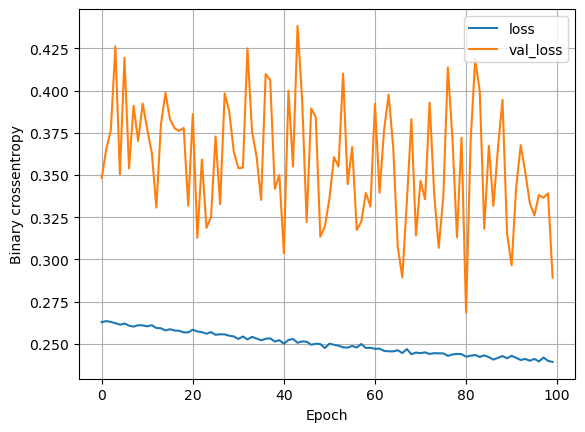

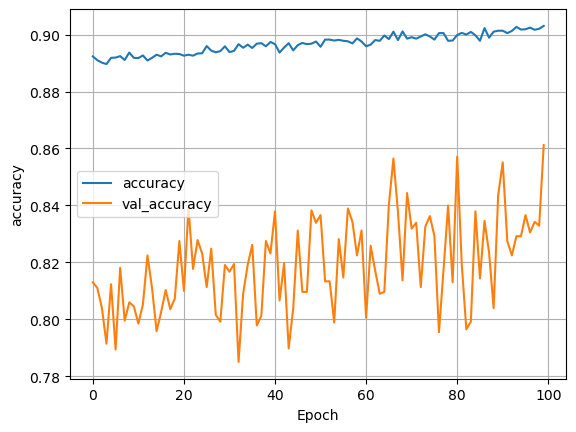

In [38]:
plot_loss(history)
plot_accuracy(history)